In [14]:
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import hopsworks
import pandas as pd

In [16]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/195734
Connected. Call `.close()` to terminate connection gracefully.


In [17]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [19]:
wine_df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

EDA of Wine data

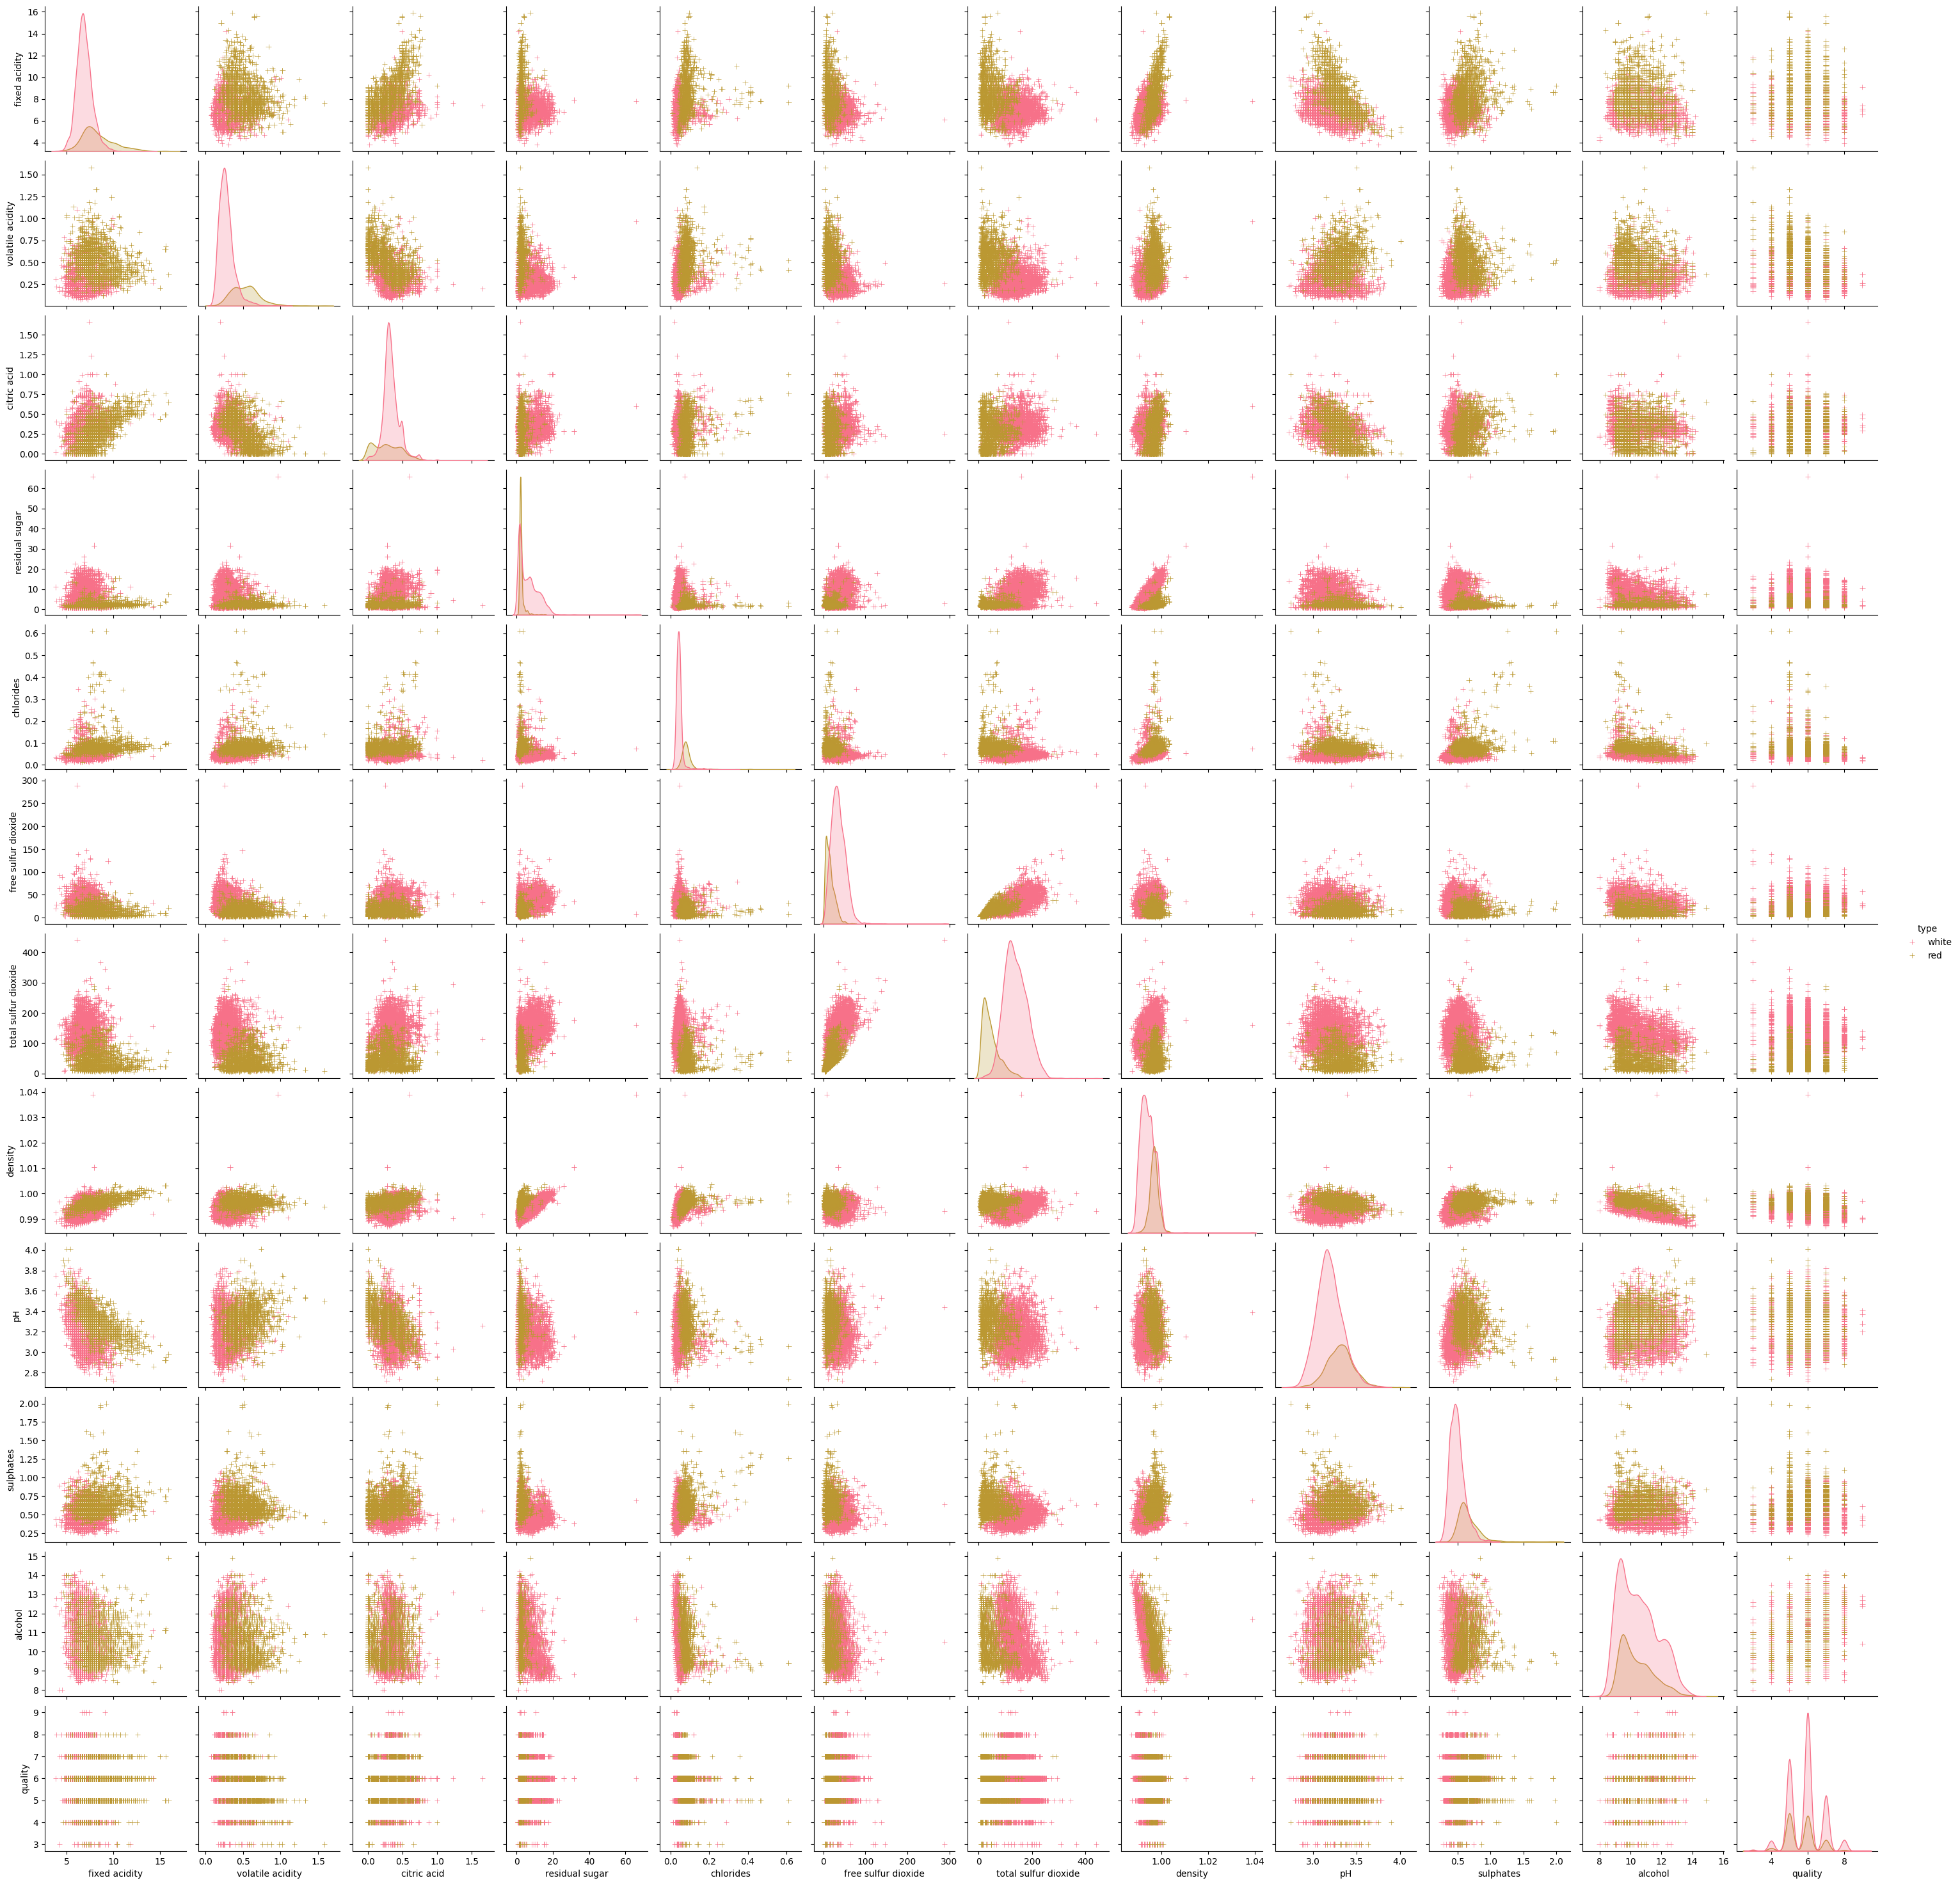

In [20]:
g = sns.pairplot(wine_df, hue="type", markers="+")
plt.show()

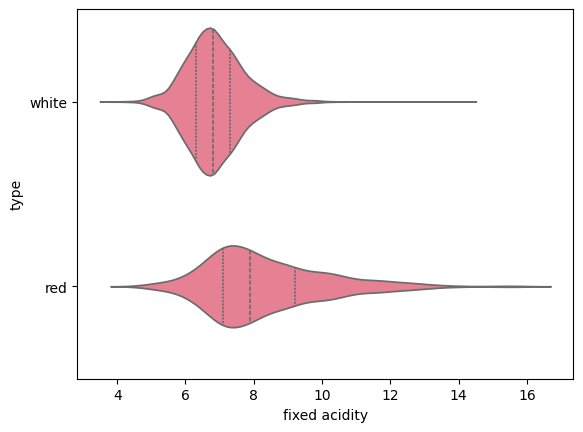

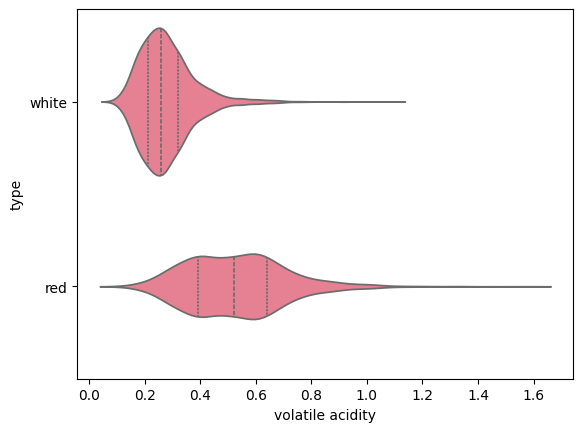

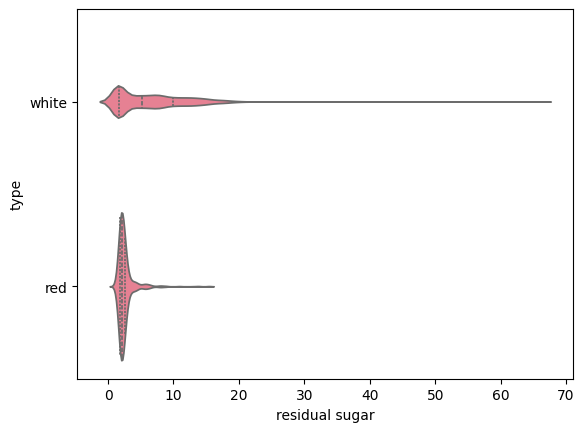

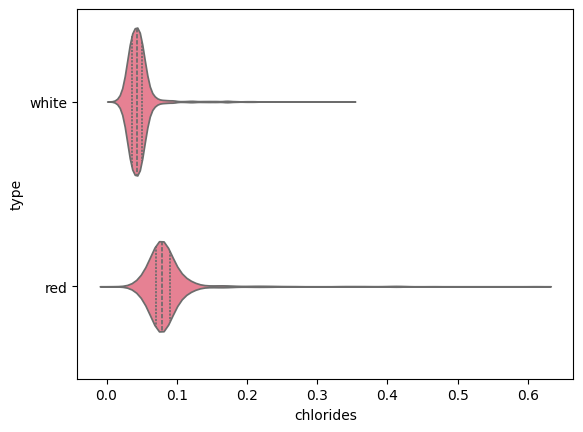

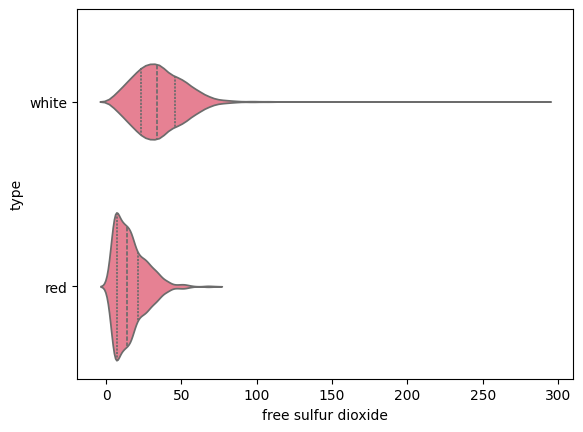

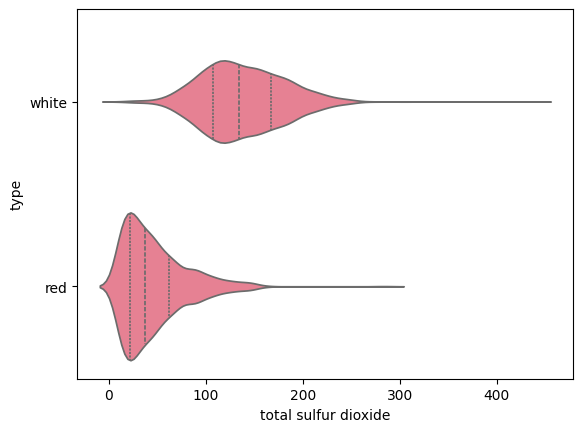

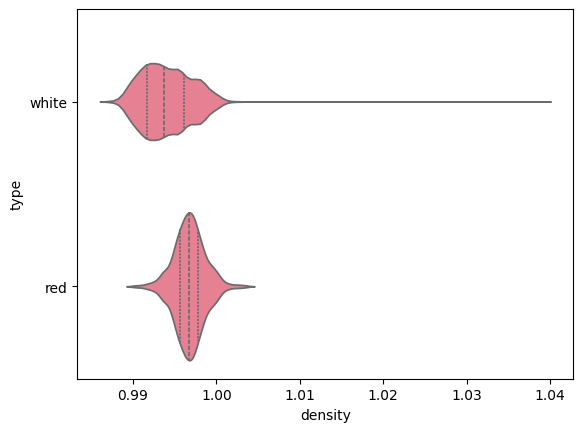

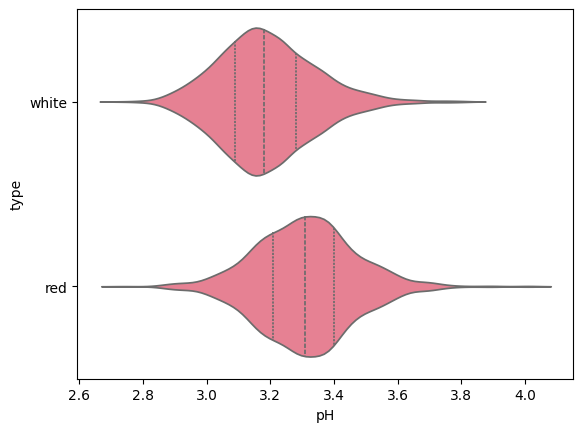

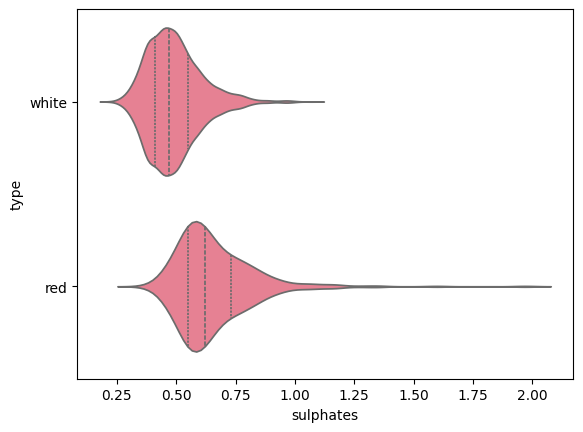

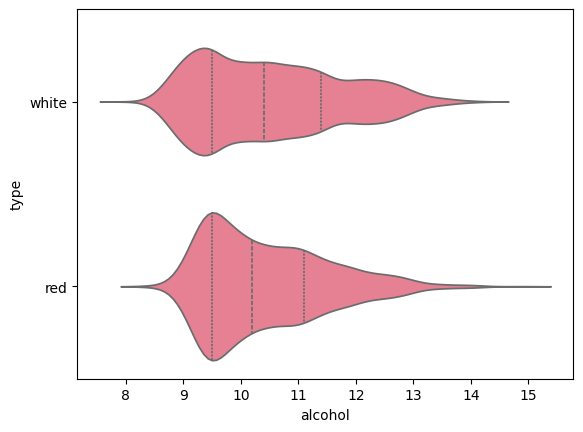

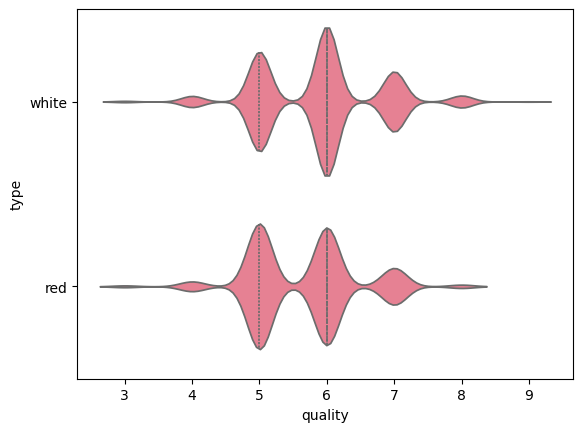

In [21]:
g = sns.violinplot(y="type", x="fixed acidity", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="volatile acidity", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="residual sugar", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="chlorides", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="free sulfur dioxide", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="total sulfur dioxide", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="density", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="pH", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="sulphates", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="alcohol", data=wine_df, inner="quartile")
plt.show()
g = sns.violinplot(y="type", x="quality", data=wine_df, inner="quartile")
plt.show()

Clean data

In [13]:
wine_df.describe(include="all")

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


In [23]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [24]:
num_cols = wine_df.select_dtypes(include=["float", "int"]).columns
for c in num_cols:
    wine_df[c].fillna(wine_df[c].mean(), inplace=True)

In [25]:
wine_df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

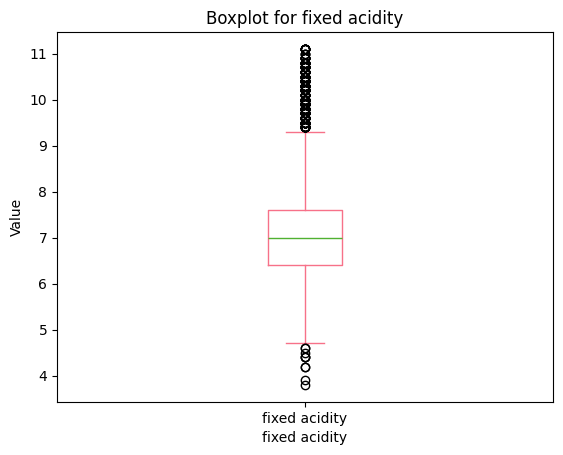

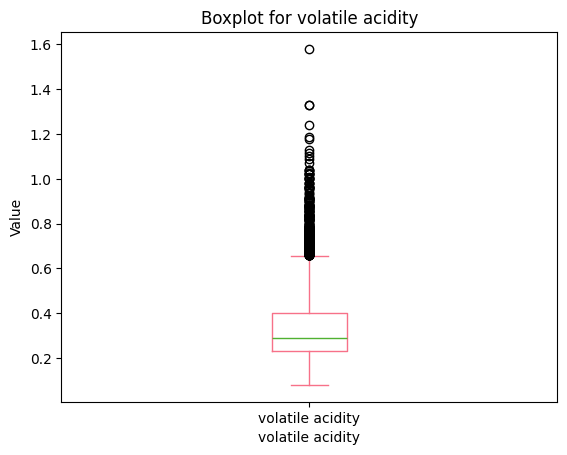

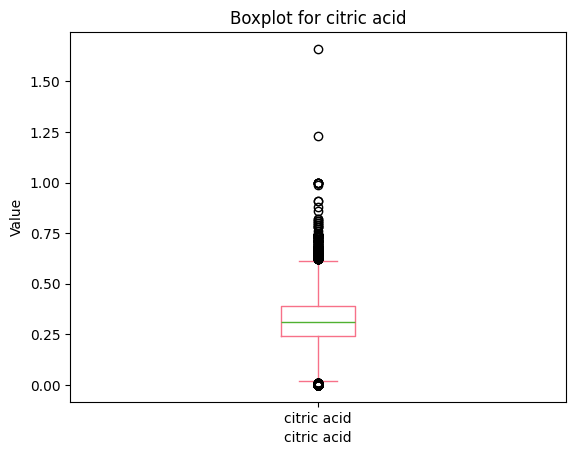

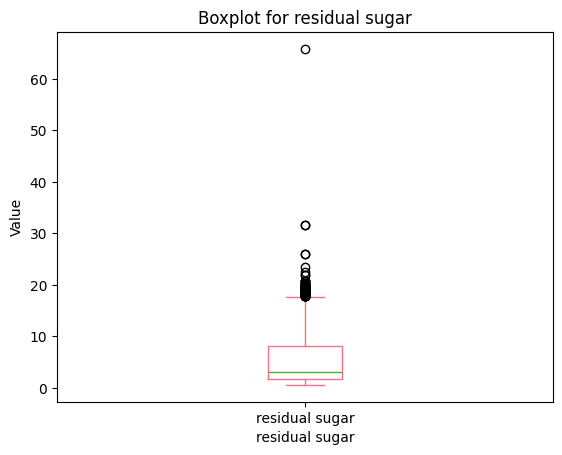

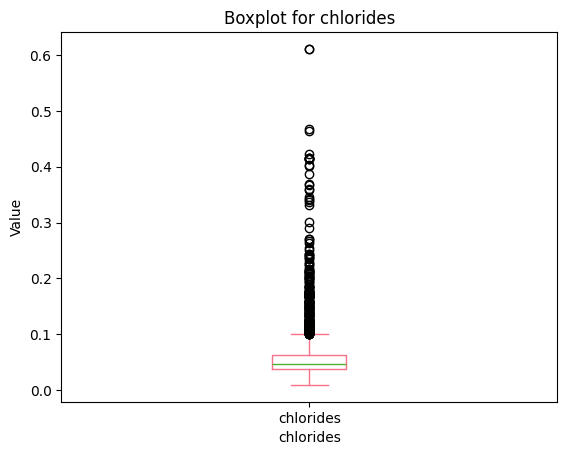

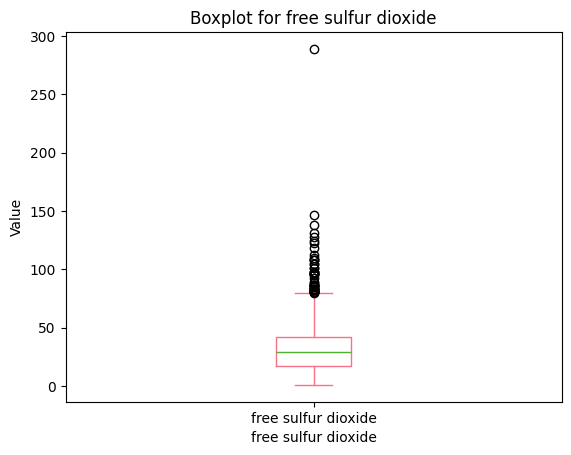

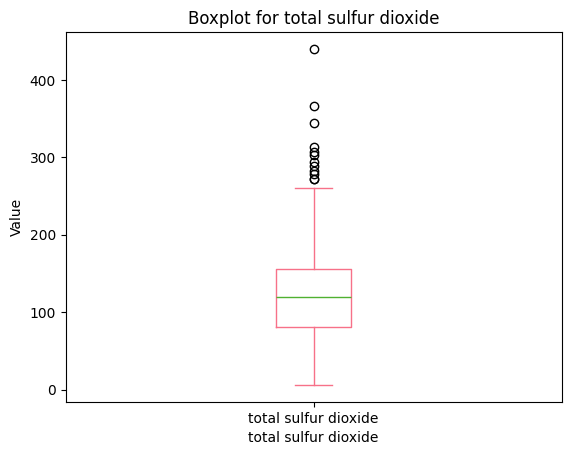

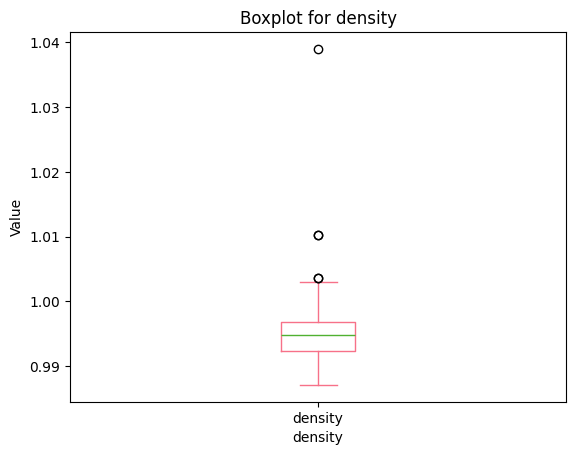

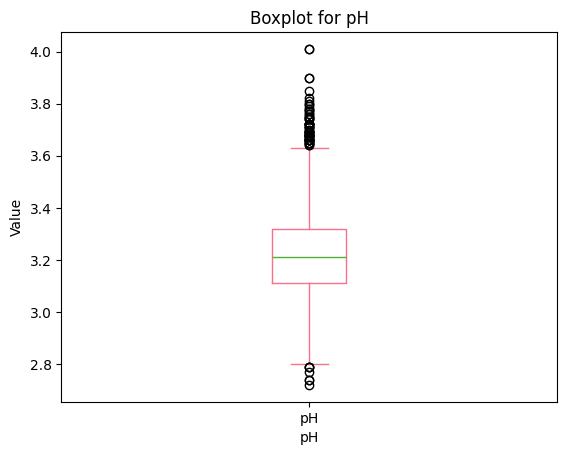

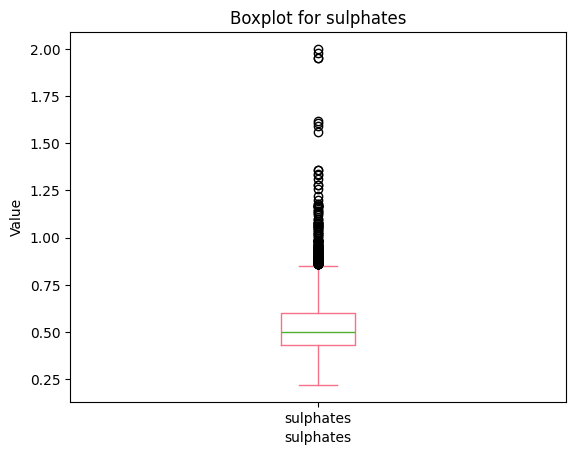

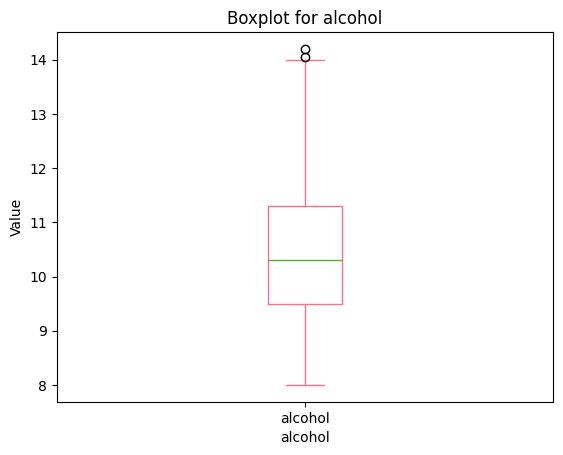

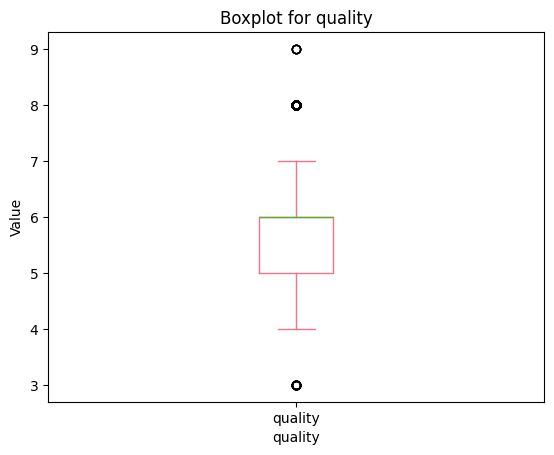

In [31]:
import numpy as np
from scipy import stats


def detect_outliers(data):
    z = np.abs(stats.zscore(data))
    return z > 3


for col in num_cols:
    plt.figure()

    # Generate boxplot
    wine_df[col].plot.box(vert=True)

    # Add x and y axis labels
    plt.xlabel(col)
    plt.ylabel("Value")

    plt.title(f"Boxplot for {col}")

    plt.show()

In [33]:
outlier_indices = []

for col in num_cols:
    # Boolean array of outlier values
    outliers = detect_outliers(wine_df[col])

    # Append outlier indexes to master list
    outlier_indices.extend(wine_df[outliers].index)

# Drop duplicates
outlier_indices = list(set(outlier_indices))

# Remove outliers
wine_df.drop(outlier_indices, inplace=True)

In [34]:
wine_df.describe(include="all")

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5878,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.050207,0.326137,0.307817,5.531769,0.051235,30.887121,118.794998,0.994456,3.218567,0.516782,10.506487,5.843654
std,NaN,0.975633,0.146284,0.127786,4.665429,0.020695,16.320399,53.851056,0.002851,0.154549,0.125166,1.196752,0.849718
min,NaN,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.400000,4.000000
25%,NaN,6.400000,0.220000,0.240000,1.800000,0.037000,18.000000,86.000000,0.992120,3.110000,0.430000,9.500000,5.000000
50%,NaN,6.900000,0.290000,0.300000,3.300000,0.046000,29.000000,120.000000,0.994600,3.210000,0.500000,10.300000,6.000000
75%,NaN,7.600000,0.390000,0.380000,8.300000,0.059000,42.000000,156.000000,0.996700,3.320000,0.590000,11.300000,6.000000


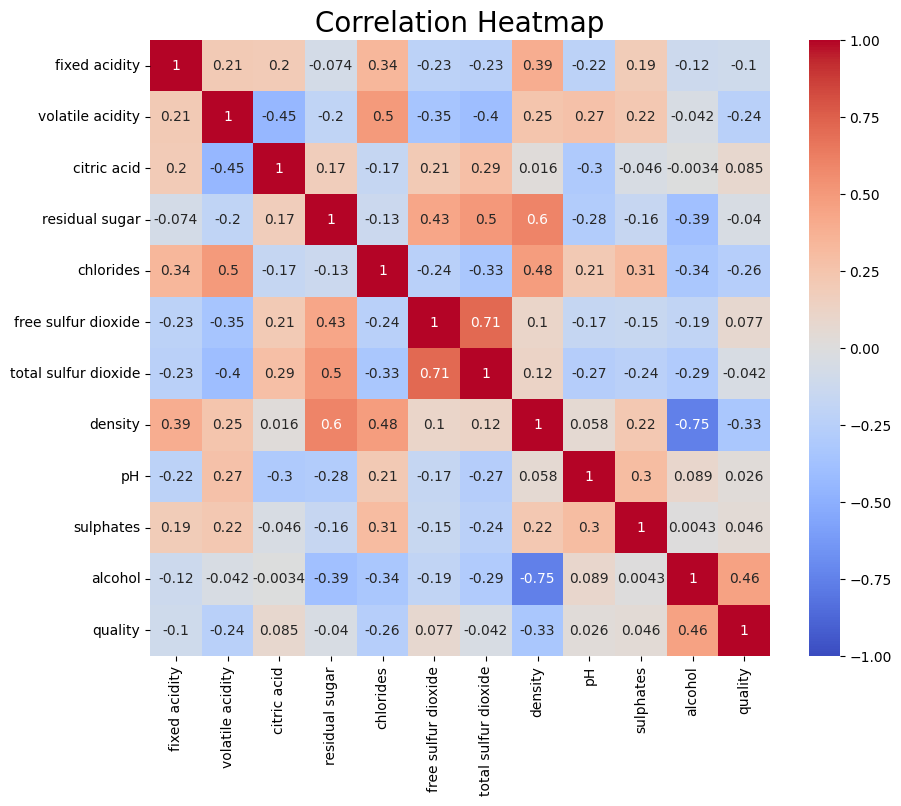

In [36]:
corr = wine_df[num_cols].corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, vmin=-1, vmax=1)

plt.title("Correlation Heatmap", size=20)
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine_df["type"] = le.fit_transform(wine_df["type"])

In [39]:
print(wine_df.corr()["quality"])

type                    0.122924
fixed acidity          -0.102966
volatile acidity       -0.244472
citric acid             0.084942
residual sugar         -0.040375
chlorides              -0.260526
free sulfur dioxide     0.076561
total sulfur dioxide   -0.041724
density                -0.328732
pH                      0.025544
sulphates               0.045899
alcohol                 0.455318
quality                 1.000000
Name: quality, dtype: float64


In [41]:
corr = wine_df.corr()["quality"]
predictive_cols = corr[abs(corr) > 0.2].index.tolist()
print(predictive_cols)

['volatile acidity', 'chlorides', 'density', 'alcohol', 'quality']


In [47]:
final_df = wine_df[predictive_cols]
final_df = final_df.rename(columns={"volatile acidity": "volatile_acidity"})

## Insert the Wine DataFram into a FeatureGroup

In [37]:
print(num_cols)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [48]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=[
        "volatile_acidity",
        "chlorides",
        "density",
        "alcohol"
    ],
    description="Wine Dataset"
)
wine_fg.insert(final_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/195734/fs/195653/fg/221566


Uploading Dataframe: 100.00% |██████████| Rows 5878/5878 | Elapsed Time: 00:05 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/195734/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x2e68acbad60>, None)